# Explore here

In [145]:
!pip install -r "/workspaces/linearreg/requirements.txt"

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [146]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import timeit
import pickle
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, make_scorer, mean_squared_error, r2_score

In [147]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [148]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [149]:
df_num=df.select_dtypes(include=np.number)

In [150]:
df_concat=df.select_dtypes(include="O")

In [151]:
df_concat.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [152]:
le = LabelEncoder()

df_encoded = df_concat.apply(le.fit_transform)

In [153]:
df_encoded.head()

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1


In [154]:
df_encoded = pd.concat([df_num, df_encoded], axis=1)

In [155]:
df_encoded.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [156]:
#EDA

<Axes: >

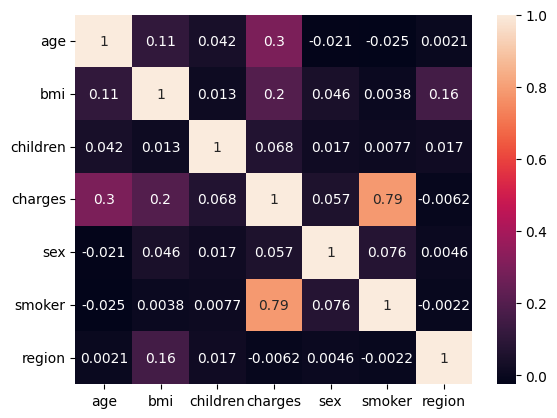

In [157]:
sns.heatmap(df_encoded.corr(), annot=True)

<Axes: xlabel='sex', ylabel='count'>

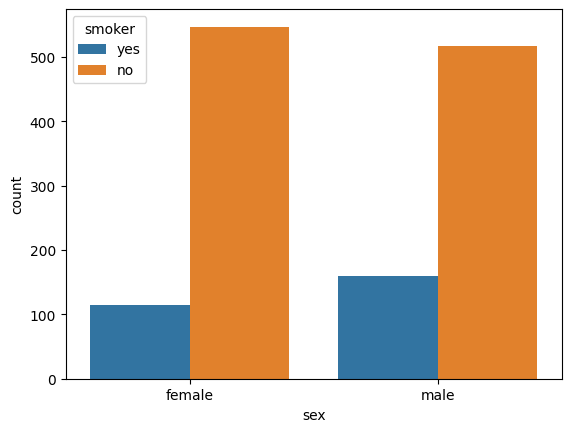

In [158]:
#analyse highest correlations (Smoker-charges)(Smoker-sex)
sns.countplot(data=df, x="sex", hue="smoker")

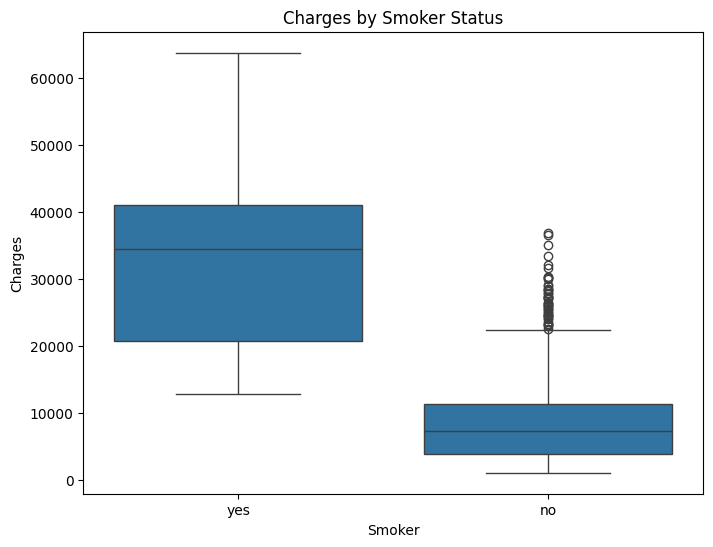

In [159]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Charges by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

In [160]:
#we can see that for smokers the median charge is significantly higher, around $35,000. While non-smokers (no): The median charge is much lower, around $7,000.
#Also the Interquartile Range is around $20,000 to $50,000 for smoker while only being $2,000 to $12,000 for non-smokers, indicating that this category has a huge impact on the charges.

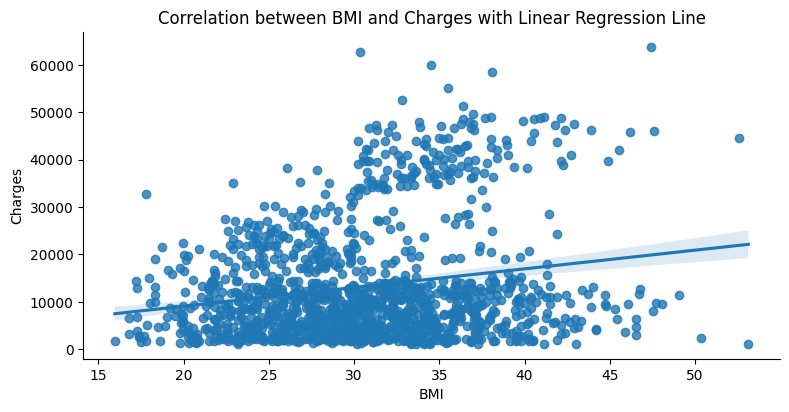

In [161]:
sns.lmplot(x="bmi", y="charges", data=df, aspect=2, height=4)
plt.title("Correlation between BMI and Charges with Linear Regression Line")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

In [162]:
#We can also see that there is a slight increase in charges as the body mass of the individual increases

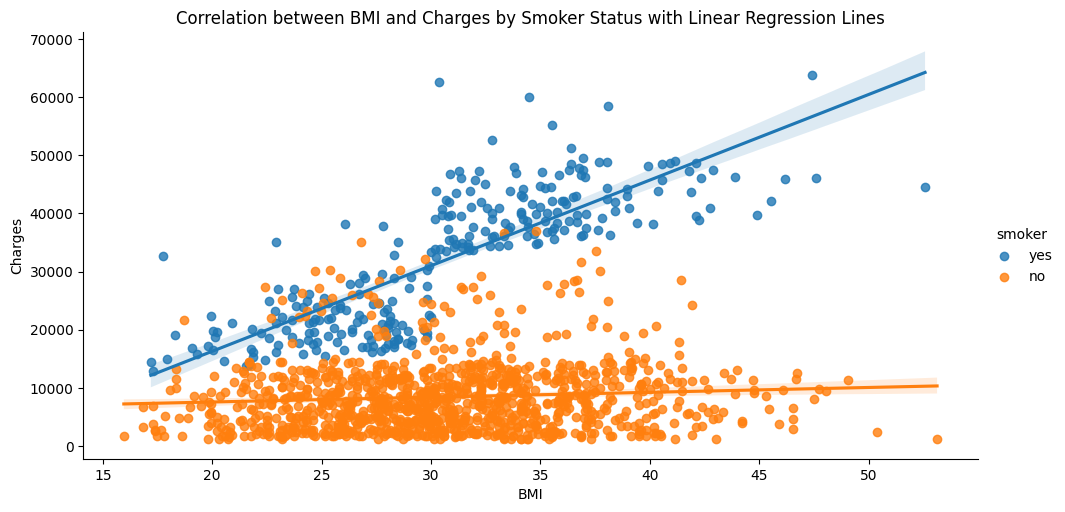

In [163]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, aspect=2, height=5)
plt.title("Correlation between BMI and Charges by Smoker Status with Linear Regression Lines")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()


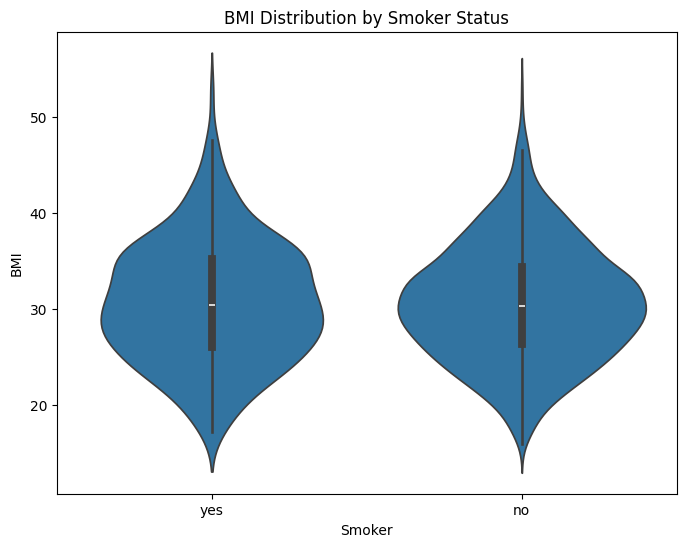

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,30.651795,6.043111,15.960,26.31500,30.3525,34.43,53.13
yes,274.0,30.708449,6.318644,17.195,26.08375,30.4475,35.20,52.58


In [164]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="smoker", y="bmi", data=df)
plt.title("BMI Distribution by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("BMI")
plt.show()

df.groupby("smoker")["bmi"].describe()


In [165]:
#We can see that being a smoker has a higher impact on the charges than having a high BMI, i also tried to see if people with higher BMI tend to smoke more but there seems to be no significant correlation.

<Axes: xlabel='children', ylabel='charges'>

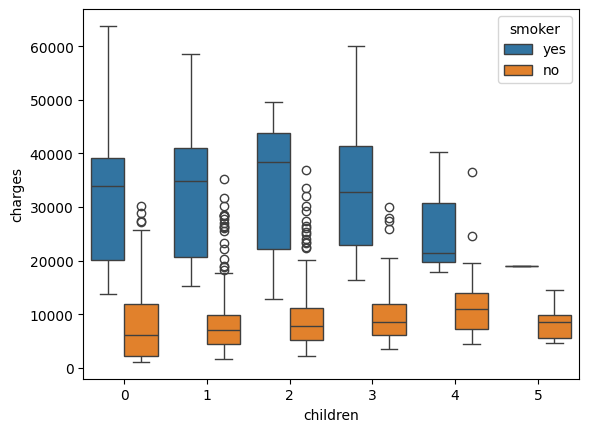

In [166]:
sns.boxplot(x="children", y="charges", data=df, hue="smoker")


In [167]:
#interesting to see that starting from the 3rd children the number of smokers drastically decreases.

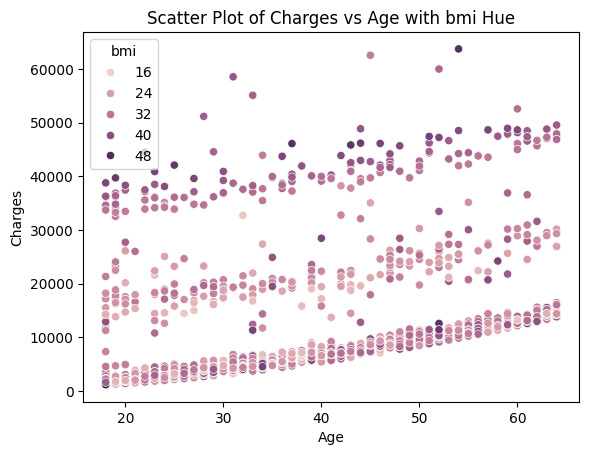

In [168]:
sns.scatterplot(x="age", y="charges", hue="bmi", data=df)
plt.title("Scatter Plot of Charges vs Age with bmi Hue")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

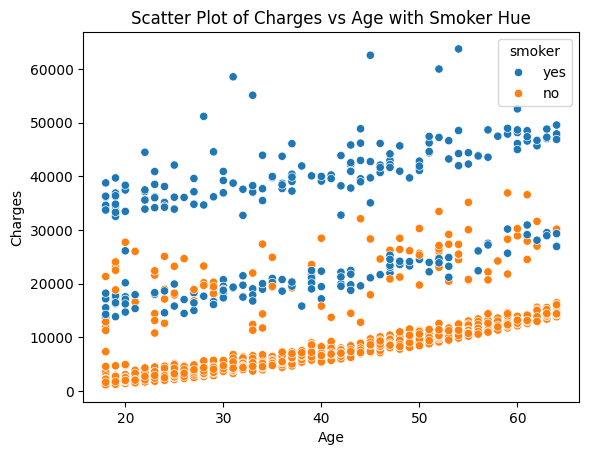

In [169]:
sns.scatterplot(x="age", y="charges", hue="smoker", data=df)
plt.title("Scatter Plot of Charges vs Age with Smoker Hue")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

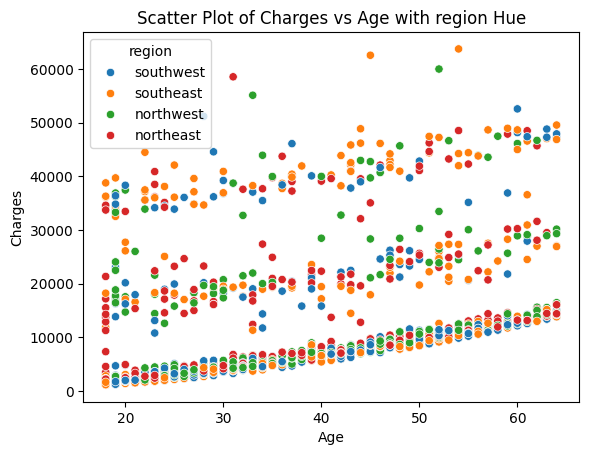

In [170]:
sns.scatterplot(x="age", y="charges", hue="region", data=df)
plt.title("Scatter Plot of Charges vs Age with region Hue")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

There are 3 clusters:
Lower cluster: Around charges of 0 to 10,000.
Middle cluster: Around charges of 10,000 to 30,000.
Upper cluster: Around charges of 30,000 to 60,000.
Clearly the non-smokers are responsible for the lower cluster but I couldnt identify what was causing the separation between the meddle cluster and the higher cluster


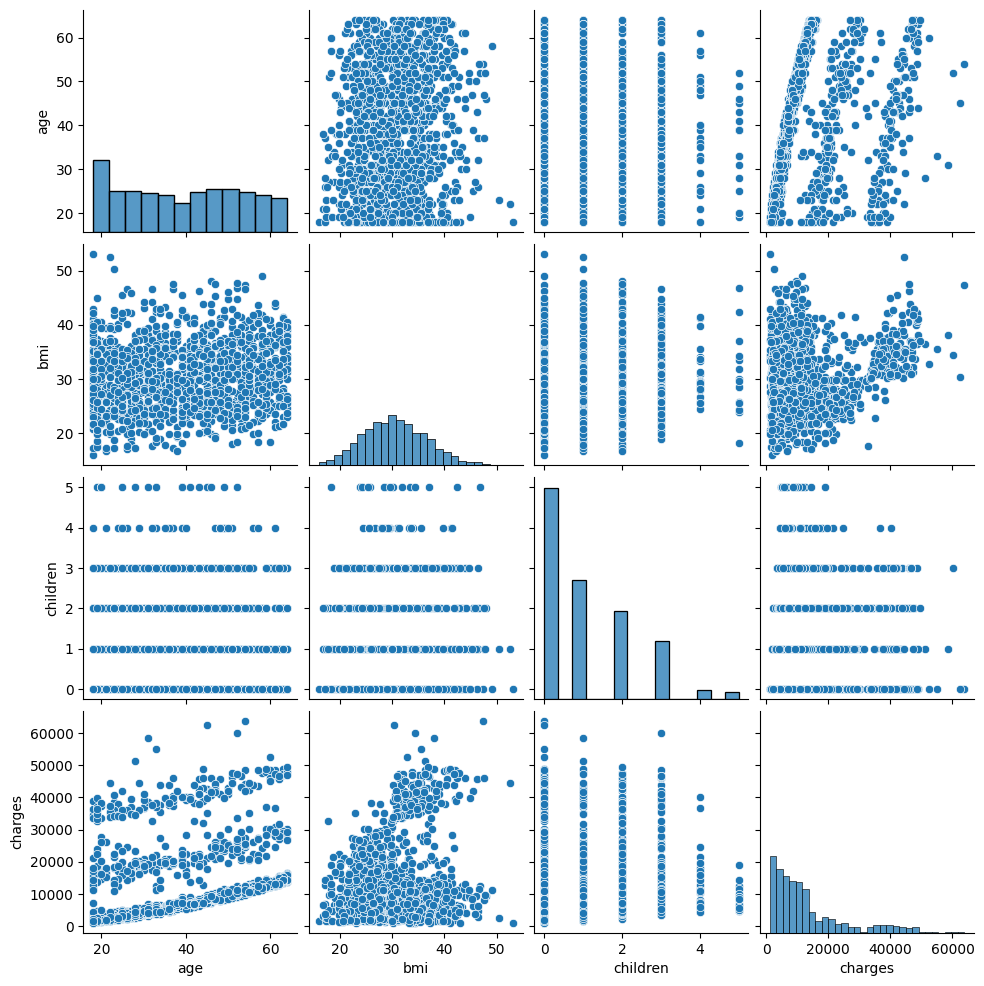

In [171]:
sns.pairplot(data=df)

In [172]:
#TRAIN TEST SPLIT

In [173]:
x = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.head()

,age,bmi,children,sex,smoker,region
560,46,19.95,2,0,0,1
1285,47,24.32,0,0,0,0
1142,52,24.86,0,0,0,2
969,39,34.32,5,0,0,2
486,54,21.47,3,0,0,1


<Axes: ylabel='Frequency'>

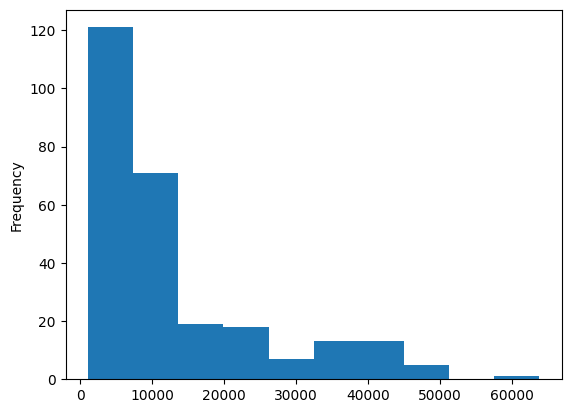

In [174]:
y_test.plot.hist()


<Axes: ylabel='Frequency'>

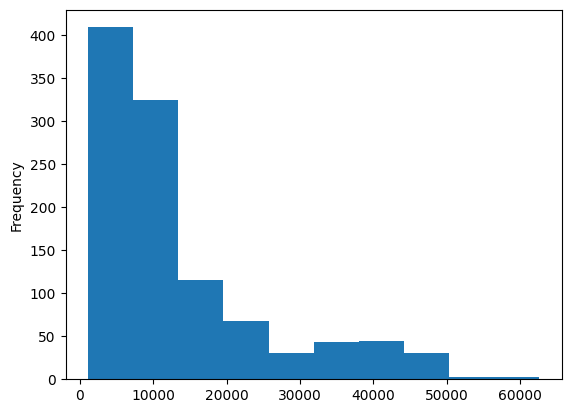

In [175]:
y_train.plot.hist()


In [176]:
x_train.to_csv("x_train.csv")

In [177]:
y_train.to_csv("y_train.csv")

In [178]:
x_test.to_csv("x_test.csv")

In [179]:
y_test.to_csv("y_test.csv")

In [180]:
selection_model = SelectKBest(f_classif, k = 6)
selection_model.fit(x_train, y_train)
ix = selection_model.get_support()
x_train = pd.DataFrame(selection_model.transform(x_train), columns = x_train.columns.values[ix])
x_test = pd.DataFrame(selection_model.transform(x_test), columns = x_test.columns.values[ix])

x_train.head()

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,age,bmi,children,sex,smoker,region
0,46.0,19.95,2.0,0.0,0.0,1.0
1,47.0,24.32,0.0,0.0,0.0,0.0
2,52.0,24.86,0.0,0.0,0.0,2.0
3,39.0,34.32,5.0,0.0,0.0,2.0
4,54.0,21.47,3.0,0.0,0.0,1.0


In [181]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scal = scaler.transform(x_train)
x_train_scal = pd.DataFrame(x_train_scal, index = x_train.index, columns=x_test.columns)

x_test_scal = scaler.transform(x_test)
x_test_scal = pd.DataFrame(x_test_scal, index = x_test.index, columns=x_test.columns)

x_train_scal.head()

,age,bmi,children,sex,smoker,region
0,0.608696,0.107345,0.4,0.0,0.0,0.333333
1,0.630435,0.224913,0.0,0.0,0.0,0.000000
2,0.739130,0.239440,0.0,0.0,0.0,0.666667
3,0.456522,0.493947,1.0,0.0,0.0,0.666667
4,0.782609,0.148238,0.6,0.0,0.0,0.333333


In [182]:
start_time = timeit.default_timer()
model = LinearRegression()
model.fit(x_train, y_train)

print("training time", timeit.default_timer()-start_time)

training time 0.0026586720005070674


In [183]:
#ASSESING MODEL

In [184]:
y_pred = model.predict(x_test)


In [185]:
print(mean_squared_error(y_test, y_pred))

33635210.43117841


In [186]:
print(r2_score(y_test, y_pred))

0.7833463107364538
